In [1]:
#pip install xgboost

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import auc, precision_recall_curve
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [3]:
data = pd.read_csv("german-data-numeric-formatted.csv")

In [4]:
data.head(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27
0,NaN,1,6,4,12,5,5,3,4,1,...,0,1,0,0,1,0,0,1,1,NaN
1,NaN,2,48,2,60,1,3,2,2,1,...,0,1,0,0,1,0,0,1,2,NaN
2,NaN,4,12,4,21,1,4,3,3,1,...,0,1,0,0,1,0,1,0,1,NaN
3,NaN,1,42,2,79,1,4,3,4,2,...,0,0,0,0,0,0,0,1,1,NaN
4,NaN,1,24,3,49,1,3,3,4,4,...,0,1,0,0,0,0,0,1,2,NaN
5,NaN,4,36,2,91,5,3,3,4,4,...,0,1,0,0,0,0,1,0,1,NaN
6,NaN,4,24,2,28,3,5,3,4,2,...,0,1,0,0,1,0,0,1,1,NaN
7,NaN,2,36,2,69,1,3,3,2,3,...,1,1,0,1,0,0,0,0,1,NaN
8,NaN,4,12,2,31,4,4,1,4,1,...,0,1,0,0,1,0,1,0,1,NaN
9,NaN,2,30,4,52,1,1,4,2,3,...,0,1,0,0,1,0,0,0,2,NaN


In [5]:
data.shape

(1000, 27)

In [6]:
data['Column1'].isnull().sum()

1000

In [7]:
data['Column27'].isnull().sum()

1000

In [8]:
data = data.drop(['Column1', 'Column27'], axis = 1)

In [9]:
data

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [10]:
data.columns = ['Checking Account','Duration (months)', 'Credit History', 
                'Column5 - Credit Amount?', 'Savings Account/Bonds', 
                'Employed Since', 'Personal Status/Sex', 'Resident Since', 
                'Property', 'Age(years)', 'Other Installment Plans', 
                'Number of Existing Credits', 'Number of liable people', 
                'Telephone', 'Foreign Worker', 'Column17', 'Column18', 
                'Column19', 'Column20', 'Column21', 'Column22', 'Column23', 
                'Column24', 'Column25', 'Cost Matrix']

In [11]:
data

,Checking Account,Duration (months),Credit History,Column5 - Credit Amount?,Savings Account/Bonds,Employed Since,Personal Status/Sex,Resident Since,Property,Age(years),...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Cost Matrix
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [12]:
data = pd.read_csv("german-formatted.csv")

In [13]:
data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [14]:
new_names={'Column1':'Status Existing Checking Account','Column2':'Duration in month','Column3':'Credit History','Column4':'Purpose','Column5':'Credit_amount','Column6':'Savings account/bonds','Column7':'Present Employment Since','Column8':'Installment rate in percentage of disposable income','Column9':'Personal status and sex','Column10':'Other debtors/guarantors','Column11':'Present residence since','Column12':'Property','Column13':'Age in years','Column14':'Other installment plans','Column15':'Housing','Column16':'Number of existing credits at this bank','Column17':'Job','Column18':'Number of people being liable to provide maintenance for','Column19':'Telephone','Column20':'Foreign worker','Column21':'Cost Matrix'}
data.rename(columns=new_names, inplace=True)

In [15]:
data

,Status Existing Checking Account,Duration in month,Credit History,Purpose,Credit_amount,Savings account/bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [16]:
df_one_hot_encoded = pd.get_dummies(data = data, columns = ["Status Existing Checking Account"], prefix = "CheckingAccount")

df_one_hot_encoded

,Duration in month,Credit History,Purpose,Credit_amount,Savings account/bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors/guarantors,Present residence since,...,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix,CheckingAccount_A11,CheckingAccount_A12,CheckingAccount_A13,CheckingAccount_A14
0,6,A34,A43,1169,A65,A75,4,A93,A101,4,...,2,A173,1,A192,A201,1,1,0,0,0
1,48,A32,A43,5951,A61,A73,2,A92,A101,2,...,1,A173,1,A191,A201,2,0,1,0,0
2,12,A34,A46,2096,A61,A74,2,A93,A101,3,...,1,A172,2,A191,A201,1,0,0,0,1
3,42,A32,A42,7882,A61,A74,2,A93,A103,4,...,1,A173,2,A191,A201,1,1,0,0,0
4,24,A33,A40,4870,A61,A73,3,A93,A101,4,...,2,A173,2,A191,A201,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,A32,A42,1736,A61,A74,3,A92,A101,4,...,1,A172,1,A191,A201,1,0,0,0,1
996,30,A32,A41,3857,A61,A73,4,A91,A101,4,...,1,A174,1,A192,A201,1,1,0,0,0
997,12,A32,A43,804,A61,A75,4,A93,A101,4,...,1,A173,1,A191,A201,1,0,0,0,1
998,45,A32,A43,1845,A61,A73,4,A93,A101,4,...,1,A173,1,A192,A201,2,1,0,0,0


In [17]:
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Credit History"], prefix = "CreditHistory")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Purpose"], prefix = "Purpose")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Savings account/bonds"], prefix = "SavingsAccountAndBonds")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Present Employment Since"], prefix = "EmployedSince")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Personal status and sex"], prefix = "MaritalStatusAndSex")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Other debtors/guarantors"], prefix = "OtherDebtorsAndGuarantors")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Property"], prefix = "Property")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Other installment plans"], prefix = "OtherInstallmentPlans")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Housing"], prefix = "Housing")
df_one_hot_encoded = pd.get_dummies(data = df_one_hot_encoded, columns = ["Job"], prefix = "Job")
df_one_hot_encoded

,Duration in month,Credit_amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix,...,OtherInstallmentPlans_A141,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,A192,A201,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,A191,A201,2,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,A191,A201,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,A191,A201,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,A191,A201,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,A191,A201,1,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,A192,A201,1,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,A191,A201,1,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,A192,A201,2,...,0,0,1,0,0,1,0,0,1,0


In [18]:
df_one_hot_encoded['Telephone'] = df_one_hot_encoded['Telephone'].replace(['A191', 'A192'], [0, 1])
df_one_hot_encoded['Foreign worker'] = df_one_hot_encoded['Foreign worker'].replace(['A201', 'A202'], [1, 0])
df_one_hot_encoded.rename(columns = {'Telephone':'hasPhone', 'Foreign worker':'isForeignWorker', 'Duration in month':'DurationInMonths',
                                    'Credit_amount':'CreditAmount', 'Installment rate in percentage of disposable income':'InstallmentRate',
                                    'Present residence since':'ResidentSince','Age in years':'AgeInYears',
                                    'Number of existing credits at this bank':'No_ExistingCredits', 
                                    'Number of people being liable to provide maintenance for':'No_Liabilities', 'Cost Matrix':'CostMatrix'}, inplace = True)
df_one_hot_encoded

,DurationInMonths,CreditAmount,InstallmentRate,ResidentSince,AgeInYears,No_ExistingCredits,No_Liabilities,hasPhone,isForeignWorker,CostMatrix,...,OtherInstallmentPlans_A141,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,2,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,2,...,0,0,1,0,0,1,0,0,1,0


In [19]:
df_one_hot_encoded['CostMatrix'] = df_one_hot_encoded['CostMatrix'].replace([2], 0)

In [20]:
df_one_hot_encoded

,DurationInMonths,CreditAmount,InstallmentRate,ResidentSince,AgeInYears,No_ExistingCredits,No_Liabilities,hasPhone,isForeignWorker,CostMatrix,...,OtherInstallmentPlans_A141,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [21]:
df_one_hot_encoded['CostMatrix'].value_counts()[1]

700

In [22]:
df_one_hot_encoded['CostMatrix'].value_counts()[0]

300

In [23]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   DurationInMonths                1000 non-null   int64
 1   CreditAmount                    1000 non-null   int64
 2   InstallmentRate                 1000 non-null   int64
 3   ResidentSince                   1000 non-null   int64
 4   AgeInYears                      1000 non-null   int64
 5   No_ExistingCredits              1000 non-null   int64
 6   No_Liabilities                  1000 non-null   int64
 7   hasPhone                        1000 non-null   int64
 8   isForeignWorker                 1000 non-null   int64
 9   CostMatrix                      1000 non-null   int64
 10  CheckingAccount_A11             1000 non-null   uint8
 11  CheckingAccount_A12             1000 non-null   uint8
 12  CheckingAccount_A13             1000 non-null   uint8
 13  Chec

In [24]:
for col in df_one_hot_encoded.columns:
    print(col)

DurationInMonths
CreditAmount
InstallmentRate
ResidentSince
AgeInYears
No_ExistingCredits
No_Liabilities
hasPhone
isForeignWorker
CostMatrix
CheckingAccount_A11
CheckingAccount_A12
CheckingAccount_A13
CheckingAccount_A14
CreditHistory_A30
CreditHistory_A31
CreditHistory_A32
CreditHistory_A33
CreditHistory_A34
Purpose_A40
Purpose_A41
Purpose_A410
Purpose_A42
Purpose_A43
Purpose_A44
Purpose_A45
Purpose_A46
Purpose_A48
Purpose_A49
SavingsAccountAndBonds_A61
SavingsAccountAndBonds_A62
SavingsAccountAndBonds_A63
SavingsAccountAndBonds_A64
SavingsAccountAndBonds_A65
EmployedSince_A71
EmployedSince_A72
EmployedSince_A73
EmployedSince_A74
EmployedSince_A75
MaritalStatusAndSex_A91
MaritalStatusAndSex_A92
MaritalStatusAndSex_A93
MaritalStatusAndSex_A94
OtherDebtorsAndGuarantors_A101
OtherDebtorsAndGuarantors_A102
OtherDebtorsAndGuarantors_A103
Property_A121
Property_A122
Property_A123
Property_A124
OtherInstallmentPlans_A141
OtherInstallmentPlans_A142
OtherInstallmentPlans_A143
Housing_A151
Hous

In [25]:
#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('CostMatrix ~ DurationInMonths+CreditAmount+InstallmentRate+ResidentSince+AgeInYears+No_ExistingCredits+No_Liabilities+hasPhone+isForeignWorker+CostMatrix+CheckingAccount_A11+CheckingAccount_A12+CheckingAccount_A13+CheckingAccount_A14+CreditHistory_A30+CreditHistory_A31+CreditHistory_A32+CreditHistory_A33+CreditHistory_A34+Purpose_A40+Purpose_A41+Purpose_A410+Purpose_A42+Purpose_A43+Purpose_A44+Purpose_A45+Purpose_A46+Purpose_A48+Purpose_A49+SavingsAccountAndBonds_A61+SavingsAccountAndBonds_A62+SavingsAccountAndBonds_A63+SavingsAccountAndBonds_A64+SavingsAccountAndBonds_A65+EmployedSince_A71+EmployedSince_A72+EmployedSince_A73+EmployedSince_A74+EmployedSince_A75+MaritalStatusAndSex_A91+MaritalStatusAndSex_A92+MaritalStatusAndSex_A93+MaritalStatusAndSex_A94+OtherDebtorsAndGuarantors_A101+OtherDebtorsAndGuarantors_A102+OtherDebtorsAndGuarantors_A103+Property_A121+Property_A122+Property_A123+Property_A124+OtherInstallmentPlans_A141+OtherInstallmentPlans_A142+OtherInstallmentPlans_A143+Housing_A151+Housing_A152+Housing_A153+Job_A171+Job_A172+Job_A173+Job_A174', data=df_one_hot_encoded, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df.to_string())

C:\Users\rcvb8\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rcvb8\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          variable       VIF
0                        Intercept  0.000000
1                 DurationInMonths  2.070539
2                     CreditAmount  2.567453
3                  InstallmentRate  1.403284
4                    ResidentSince  1.344178
5                       AgeInYears  1.472636
6               No_ExistingCredits  1.651742
7                   No_Liabilities  1.195563
8                         hasPhone  1.336291
9                  isForeignWorker  1.121868
10                      CostMatrix  1.391690
11             CheckingAccount_A11       inf
12             CheckingAccount_A12       inf
13             CheckingAccount_A13       inf
14             CheckingAccount_A14       inf
15               CreditHistory_A30       inf
16               CreditHistory_A31       inf
17               CreditHistory_A32       inf
18               CreditHistory_A33       inf
19               CreditHistory_A34       inf
20                     Purpose_A40       inf
21        

### Mutli MLA Test - Precision-Recall Curve

In [26]:
# now lets split the data into train and test


In [27]:
test1 = df_one_hot_encoded

In [28]:
# Putting feature variable to X
X = test1.drop('CostMatrix',axis=1)
# Putting response variable to y
y = test1['CostMatrix']

In [29]:
# now lets split the data into train and test


In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((700, 59), (300, 59))

In [31]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [32]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: total: 172 ms
Wall time: 474 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [33]:
# checking the oob score
classifier_rf.oob_score_

0.7214285714285714

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [35]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.52 s
Wall time: 1min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [36]:
grid_search.best_score_

0.7585714285714286

In [37]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

## Random Forest Algorithm from David

In [64]:
df = df_one_hot_encoded

In [65]:
X = df.drop('CostMatrix', axis=1)
y = df['CostMatrix']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [66]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

model_gb = GradientBoostingClassifier().fit(X_train, y_train)
probs_gb = model_gb.predict_proba(X_test)[:, 1]

C:\Users\rcvb8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
baseline_model = sum(y_test == 1) / len(y_test)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

precision_gb, recall_gb, _ = precision_recall_curve(y_test, probs_gb)
auc_gb = auc(recall_gb, precision_gb)

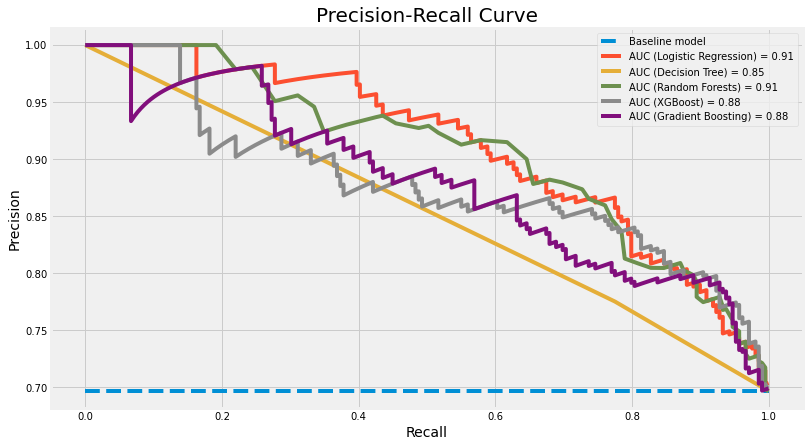

In [68]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(recall_gb, precision_gb, label=f'AUC (Gradient Boosting) = {auc_gb:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

C:\Users\rcvb8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


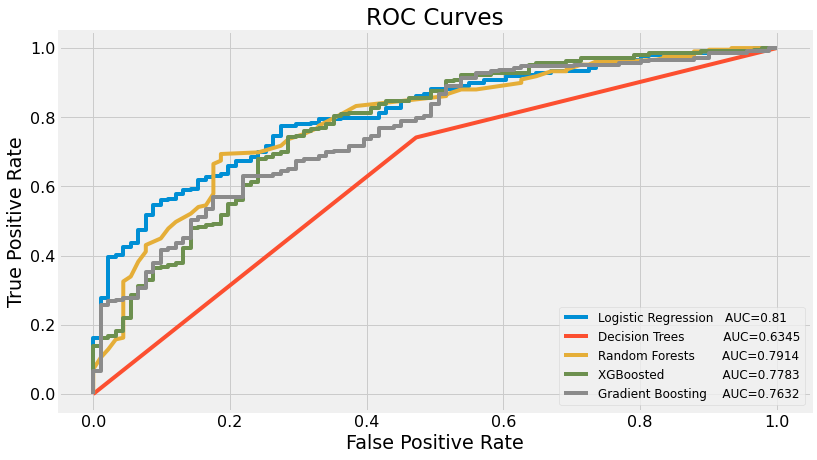

In [69]:
#set up plotting area
plt.figure(figsize = (12, 7)).clf()
plt.rcParams['font.size'] = 16

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression   AUC="+str(auc))

#fit decision tree model and plot ROC curve
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Trees          AUC="+str(auc))

#fit random forests model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forests       AUC="+str(auc))

#fit XGBoosted model and plot ROC curve
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoosted               AUC="+str(auc))

#fit XGBoosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting    AUC="+str(auc))

plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate'); 
plt.title('ROC Curves');

#add legend
plt.legend(fontsize = "12")

In [38]:
# # Load in data
# df = df_one_hot_encoded

# # Extract the labels
# labels = np.array(df.pop('CostMatrix'))

In [39]:
# # 30% examples in test data
# train, test, train_labels, test_labels = train_test_split(df,
#                                          labels, 
#                                          stratify = labels,
#                                          test_size = 0.3, 
#                                          random_state = RSEED)


# # Features for feature importances
# features = list(train.columns)

In [40]:
# # Create the model with 100 trees
# model = RandomForestClassifier(n_estimators=50, 
#                                random_state=RSEED, 
#                                max_features = 'sqrt',
#                                n_jobs=-1, verbose = 1)

# # Fit on training data
# model.fit(train, train_labels)
# n_nodes = []
# max_depths = []

In [41]:
# # Stats about the trees in random forest
# for ind_tree in model.estimators_:
#     n_nodes.append(ind_tree.tree_.node_count)
#     max_depths.append(ind_tree.tree_.max_depth)
    
# print(f'Average number of nodes {int(np.mean(n_nodes))}')
# print(f'Average maximum depth {int(np.mean(max_depths))}')

In [42]:
# # Training predictions (to demonstrate overfitting)
# train_rf_predictions = model.predict(train)
# train_rf_probs = model.predict_proba(train)[:, 1]

# # Testing predictions (to determine performance)
# rf_predictions = model.predict(test)
# rf_probs = model.predict_proba(test)[:, 1]

In [43]:
# # Plot formatting
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18

# def evaluate_model(predictions, probs, train_predictions, train_probs):
#     """Compare machine learning model to baseline performance.
#     Computes statistics and shows ROC curve."""
    
#     baseline = {}
    
#     baseline['recall'] = recall_score(test_labels, 
#                                      [1 for _ in range(len(test_labels))])
#     baseline['precision'] = precision_score(test_labels, 
#                                       [1 for _ in range(len(test_labels))])
#     baseline['roc'] = 0.5
    
#     results = {}
    
#     results['recall'] = recall_score(test_labels, predictions)
#     results['precision'] = precision_score(test_labels, predictions)
#     results['roc'] = roc_auc_score(test_labels, probs)
    
#     train_results = {}
#     train_results['recall'] = recall_score(train_labels, train_predictions)
#     train_results['precision'] = precision_score(train_labels, train_predictions)
#     train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
#     for metric in ['recall', 'precision', 'roc']:
#         print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
#     # Calculate false positive rates and true positive rates
#     base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
#     model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

#     plt.figure(figsize = (8, 6))
#     plt.rcParams['font.size'] = 16
    
#     # Plot both curves
#     plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
#     plt.plot(model_fpr, model_tpr, 'r', label = 'model')
#     plt.legend();
#     plt.xlabel('False Positive Rate'); 
#     plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
#     plt.show();

# evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
# plt.savefig('roc_auc_curve.png')

In [45]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Oranges):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     # Plot the confusion matrix
#     plt.figure(figsize = (10, 10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, size = 24)
#     plt.colorbar(aspect=4)
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45, size = 14)
#     plt.yticks(tick_marks, classes, size = 14)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    
#     # Labeling the plot
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
        
#     plt.grid(None)
#     plt.tight_layout()
#     plt.ylabel('True label', size = 18)
#     plt.xlabel('Predicted label', size = 18)

# # Confusion matrix
# cm = confusion_matrix(test_labels, rf_predictions)
# plot_confusion_matrix(cm, classes = ['Not Worthy', 'Worthy'],
#                       title = 'Credit Worthiness Confusion Matrix')

# plt.savefig('cm.png')

In [46]:
# Accuracy at predicting values = 78.6%
# False Postives (Not worthy, but voted worthy) = 15%
# This is problematic because these people are more likely to default on loans
# False Negatives (Worthy, but voted not worthy) = 6.3%
# This is a relatively okay number. It is better not to give loans to be people
# who are capable of paying it off then to those who can't 

## Reduce Multicolinarity & Implement Random Forest Algorithm

In [47]:
test2 = pd.get_dummies(data = data, columns = ["Status Existing Checking Account"], prefix = "CheckingAccount", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Credit History"], prefix = "CreditHistory", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Purpose"], prefix = "Purpose", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Savings account/bonds"], prefix = "SavingsAccountAndBonds", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Present Employment Since"], prefix = "EmployedSince", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Personal status and sex"], prefix = "MaritalStatusAndSex", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Other debtors/guarantors"], prefix = "OtherDebtorsAndGuarantors", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Property"], prefix = "Property", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Other installment plans"], prefix = "OtherInstallmentPlans", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Housing"], prefix = "Housing", drop_first = True)
test2 = pd.get_dummies(data = test2, columns = ["Job"], prefix = "Job", drop_first = True)
test2

,Duration in month,Credit_amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix,...,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,A192,A201,1,...,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,A191,A201,2,...,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,A191,A201,1,...,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,A191,A201,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,A191,A201,2,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,A191,A201,1,...,0,0,0,0,1,1,0,1,0,0
996,30,3857,4,4,40,1,1,A192,A201,1,...,1,0,0,0,1,1,0,0,0,1
997,12,804,4,4,38,1,1,A191,A201,1,...,0,1,0,0,1,1,0,0,1,0
998,45,1845,4,4,23,1,1,A192,A201,2,...,0,0,1,0,1,0,1,0,1,0


In [48]:
test2['Telephone'] = test2['Telephone'].replace(['A191', 'A192'], [0, 1])
test2['Foreign worker'] = test2['Foreign worker'].replace(['A201', 'A202'], [1, 0])
test2.rename(columns = {'Telephone':'hasPhone', 'Foreign worker':'isForeignWorker', 'Duration in month':'DurationInMonths',
                                    'Credit_amount':'CreditAmount', 'Installment rate in percentage of disposable income':'InstallmentRate',
                                    'Present residence since':'ResidentSince','Age in years':'AgeInYears',
                                    'Number of existing credits at this bank':'No_ExistingCredits', 
                                    'Number of people being liable to provide maintenance for':'No_Liabilities', 'Cost Matrix':'CostMatrix'}, inplace = True)
test2

,DurationInMonths,CreditAmount,InstallmentRate,ResidentSince,AgeInYears,No_ExistingCredits,No_Liabilities,hasPhone,isForeignWorker,CostMatrix,...,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,2,...,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,2,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,1,0,0,0,1,1,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,1,0,0,1,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,2,...,0,0,1,0,1,0,1,0,1,0


In [49]:
test2['CostMatrix'] = test2['CostMatrix'].replace([2], 0)

In [50]:
test2

,DurationInMonths,CreditAmount,InstallmentRate,ResidentSince,AgeInYears,No_ExistingCredits,No_Liabilities,hasPhone,isForeignWorker,CostMatrix,...,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,1,0,0,0,1,1,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,1,0,0,1,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,1,0,1,0,1,0,1,0


In [51]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   DurationInMonths                1000 non-null   int64
 1   CreditAmount                    1000 non-null   int64
 2   InstallmentRate                 1000 non-null   int64
 3   ResidentSince                   1000 non-null   int64
 4   AgeInYears                      1000 non-null   int64
 5   No_ExistingCredits              1000 non-null   int64
 6   No_Liabilities                  1000 non-null   int64
 7   hasPhone                        1000 non-null   int64
 8   isForeignWorker                 1000 non-null   int64
 9   CostMatrix                      1000 non-null   int64
 10  CheckingAccount_A12             1000 non-null   uint8
 11  CheckingAccount_A13             1000 non-null   uint8
 12  CheckingAccount_A14             1000 non-null   uint8
 13  Cred

In [52]:
for col in test2.columns:
    print(col)

DurationInMonths
CreditAmount
InstallmentRate
ResidentSince
AgeInYears
No_ExistingCredits
No_Liabilities
hasPhone
isForeignWorker
CostMatrix
CheckingAccount_A12
CheckingAccount_A13
CheckingAccount_A14
CreditHistory_A31
CreditHistory_A32
CreditHistory_A33
CreditHistory_A34
Purpose_A41
Purpose_A410
Purpose_A42
Purpose_A43
Purpose_A44
Purpose_A45
Purpose_A46
Purpose_A48
Purpose_A49
SavingsAccountAndBonds_A62
SavingsAccountAndBonds_A63
SavingsAccountAndBonds_A64
SavingsAccountAndBonds_A65
EmployedSince_A72
EmployedSince_A73
EmployedSince_A74
EmployedSince_A75
MaritalStatusAndSex_A92
MaritalStatusAndSex_A93
MaritalStatusAndSex_A94
OtherDebtorsAndGuarantors_A102
OtherDebtorsAndGuarantors_A103
Property_A122
Property_A123
Property_A124
OtherInstallmentPlans_A142
OtherInstallmentPlans_A143
Housing_A152
Housing_A153
Job_A172
Job_A173
Job_A174


In [53]:
#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('CostMatrix ~ DurationInMonths+CreditAmount+InstallmentRate+ResidentSince+AgeInYears+No_ExistingCredits+No_Liabilities+hasPhone+isForeignWorker+CostMatrix+CheckingAccount_A12+CheckingAccount_A13+CheckingAccount_A14+CreditHistory_A31+CreditHistory_A32+CreditHistory_A33+CreditHistory_A34+Purpose_A41+Purpose_A410+Purpose_A42+Purpose_A43+Purpose_A44+Purpose_A45+Purpose_A46+Purpose_A48+Purpose_A49+SavingsAccountAndBonds_A62+SavingsAccountAndBonds_A63+SavingsAccountAndBonds_A64+SavingsAccountAndBonds_A65+EmployedSince_A72+EmployedSince_A73+EmployedSince_A74+EmployedSince_A75+MaritalStatusAndSex_A92+MaritalStatusAndSex_A93+MaritalStatusAndSex_A94+OtherDebtorsAndGuarantors_A102+OtherDebtorsAndGuarantors_A103+Property_A122+Property_A123+Property_A124+OtherInstallmentPlans_A142+OtherInstallmentPlans_A143+Housing_A152+Housing_A153+Job_A172+Job_A173+Job_A174', data=test2, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df.to_string())

                          variable         VIF
0                        Intercept  207.325264
1                 DurationInMonths    2.070539
2                     CreditAmount    2.567453
3                  InstallmentRate    1.403284
4                    ResidentSince    1.344178
5                       AgeInYears    1.472636
6               No_ExistingCredits    1.651742
7                   No_Liabilities    1.195563
8                         hasPhone    1.336291
9                  isForeignWorker    1.121868
10                      CostMatrix    1.391690
11             CheckingAccount_A12    1.684938
12             CheckingAccount_A13    1.254685
13             CheckingAccount_A14    1.906290
14               CreditHistory_A31    2.395903
15               CreditHistory_A32    7.926097
16               CreditHistory_A33    3.089377
17               CreditHistory_A34    6.816511
18                     Purpose_A41    1.495835
19                    Purpose_A410    1.180506
20           

In [54]:
RSEED = 50

# Extract the labels
labels = np.array(test2.pop('CostMatrix'))

In [55]:
# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(test2,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)


# Features for feature importances
features = list(train.columns)

In [56]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=50, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)
n_nodes = []
max_depths = []

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [57]:
# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 355
Average maximum depth 19


In [58]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.91 Train: 1.0
Precision Baseline: 0.7 Test: 0.8 Train: 1.0
Roc Baseline: 0.5 Test: 0.8 Train: 1.0


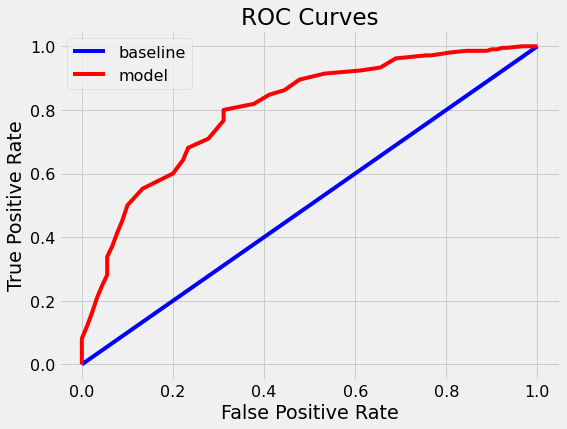

<Figure size 432x288 with 0 Axes>

In [59]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

Confusion matrix, without normalization
[[ 42  48]
 [ 18 192]]


C:\Users\rcvb8\AppData\Local\Temp\ipykernel_17564\3803484093.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aspect=4)


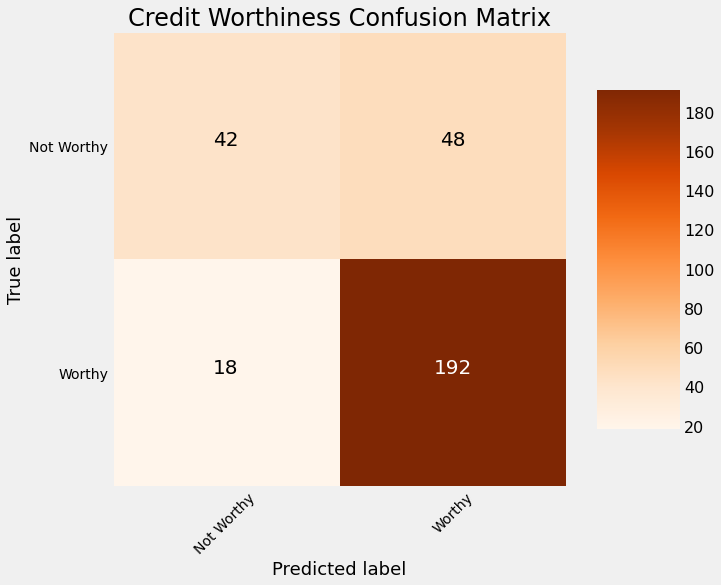

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Not Worthy', 'Worthy'],
                      title = 'Credit Worthiness Confusion Matrix')

plt.savefig('cm.png')